In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cm
import moviepy.video.io.ImageSequenceClip

In [2]:
# Define a path to this lesson's folder
ts_folder = '/Users/alex/Desktop/FinalModel/notebooks/ts_hour'
vel_folder = '/Users/alex/Desktop/FinalModel/notebooks/vel_hour'
image_folder = '/Users/alex/Desktop/FinalModel/notebooks/images'
figure_folder = '/Users/alex/Desktop/FinalModel/notebooks/figures'

In [3]:
# fill in the information here
n_rows = 360 
n_cols = 240
nR=88

In [4]:
def plot_frame(data_path, image_path):

    fig = plt.figure(figsize = (10,6))

    vel_grid = np.fromfile(data_path, '>f4').reshape((3,nR,n_rows,n_cols))
    KE_grid = 0.5 * (vel_grid[0,:,:,:]**2 +vel_grid[1,:,:,:]**2 +vel_grid[2,:,:,:]**2)
    plt.pcolormesh(KE_grid[:,200,:], cmap=cm.speed,vmin=0,vmax=0.15)
    plt.gca().invert_yaxis()
    plt.colorbar(label='J/kg')
    plt.xlabel('Model columns')
    plt.ylabel('Vertical levels')
    plt.title('Kinetic energy per unit mass (J/kg)')

    plt.savefig(image_path)
    plt.close(fig)

In [5]:
file_list = []

for it in range(360,27000+1,720):
    
    # identify the data file path
    data_path = os.path.join(vel_folder, 'vel_hour.' + '{:010d}'.format(it)+'.data')

    # identify the image file path
    image_path = os.path.join(image_folder,'vel_hour.' + '{:010d}'.format(it)+'.png')

    # call the plotting function
    plot_frame(data_path, image_path)

    # add the image path to the file path list (for the next step)
    file_list.append(image_path)

# set the frames per second
fps=10

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_list, fps=fps)

# write the video to a file
output_file = os.path.join(figure_folder, 'kineticenergy_CS.mp4')
clip.write_videofile(output_file)

Moviepy - Building video /Users/alex/Desktop/FinalModel/notebooks/figures/kineticenergy_CS.mp4.
Moviepy - Writing video /Users/alex/Desktop/FinalModel/notebooks/figures/kineticenergy_CS.mp4



Moviepy - Done !
Moviepy - video ready /Users/alex/Desktop/FinalModel/notebooks/figures/kineticenergy_CS.mp4


In [9]:
KE = []
for it in range(360,27000+1,720):
    
    # identify the data file path
    data_path = os.path.join(vel_folder, 'vel_hour.' + '{:010d}'.format(it)+'.data')
    vel_grid = np.fromfile(data_path, '>f4').reshape((3,nR,n_rows,n_cols))
    KE_grid = 0.5 * (vel_grid[0,:,:,:]**2 +vel_grid[1,:,:,:]**2 +vel_grid[2,:,:,:]**2)
    current_KE=np.sum(KE_grid)
    KE.append(current_KE)
KE=np.array(KE)

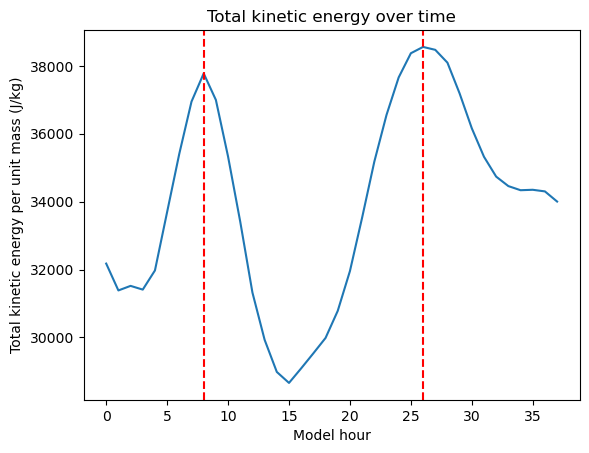

In [22]:
plt.plot(KE)
plt.xlabel('Model hour')
plt.ylabel('Total kinetic energy per unit mass (J/kg)')
plt.title('Total kinetic energy over time')
plt.axvline(x=8, color='red', linestyle='--', linewidth=1.5)
plt.axvline(x=26, color='red', linestyle='--', linewidth=1.5)
plt.savefig('figures/KE_timeseries.png',dpi=300)

The plot above shows a wave-like pattern in total kinetic energy, with peaks at roughly 8 and 26 hours. This indicates an approximately 18-hour period, which indicates that the TKE peaks are recurring at just under the inertial period, calculated below as 19.98 hours for Monterey Bay:

In [20]:
inertial_period=(2*np.pi)/(2*(7.29*10**-5)*np.sin(np.deg2rad(36.8)))
inertial_period_hours=inertial_period/3600
print(inertial_period_hours)

19.9837004839345


Although the model may simply be spinning up and thus exhibiting oscillations in TKE not driven by the internal waves visible in the figures, these cycles of total kinetic energy appears to indicate that these internal waves are near-inertial, which can be generated by "wind, nonlinear interactions with waves of other frequencies, lee waves over bottom topography, and geostrophic adjustment" (https://www.annualreviews.org/content/journals/10.1146/annurev-marine-010814-015746). All of these mechanisms should be possibilities in my model, but wind appears to be most plausible given the external forcing conditions (although it seems possible that the apparent NIWs may simply be adjustments from the initial/boundary model state given by LLC4320). As expected, constant boundary conditions did not generate internal tidal waves at the M2 (12.42 hour) frequency.